# Project 2: Intrusion Detection
Nathan Willis, Ahil Jamal, Seth Kacura, Jon Davidson

## Table of Contents
1. Prompt
2. Notes
  1. Content Provided
    1. Derived features from original content
3. Data
  1. Data Processing
    1. Mounting Google Drive
    2. Importing Libraries
    3. Cleaning
    4. Functions
    5. Locating the Data
    6. Training Dataset
  2. Observations of Dataset
4. Correlation
  1. Categoric Correlation
    1. The Use of Categorical Feature Transform
    2. Visualization of Categorical 'Important Attributes' of Correlation Matrix
    3. Protocol Correlation
    4. Service Correlation
    5. Flag Correlation
    6. Categoric Correlation Results
  2. Numeric Correlation
    1. Display of 'Important Attributes'
    2. Visualization of 'Important Attributes' of Correlation Matrix
    3. Numeric Correlation Results
    

## Prompt
In class, we talked about intrusion detection, specifically two types - host-based and
network-based IDS. Now you are giving this opportunity to form a group of 1-4 to work on
this intrusion detection project.
For this assignment, you are giving a dataset, adapted from KDD-CUP-99. You can find more
detailed information from https://kdd.ics.uci.edu/databases/kddcup99/task.html.

Briefly, the dataset to be analyzed was provided which consists of a wide variety of intrusions
simulated in a military network environment. It created an environment to acquire raw
TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was
focused like a real environment and blasted with multiple attacks. A connection is a
sequence of TCP packets starting and ending at some time duration between which data
flows to and from a source IP address to a target IP address under some well-defined
protocol. Also, each connection is labelled as either normal or as an attack with exactly one
specific attack type. Each connection record consists of about 100 bytes. For each TCP/IP
connection, 41 quantitative and qualitative features are obtained from normal and attack
data (3 qualitative and 38 quantitative features). The class variable has two categories:
* Normal
* Anomalous

You will be given a train_subset and test_subset. You may use your train_subset however you
want ( i.e. further splitting to train validation or k fold cross validation); you can only use your
test_subset at test time.
For this project, you need to perform the following:
1. Form a group of 1-4 students (each student needs to contribute)
2. Do some exploratory data analysis. Answer the following questions:

  1. Is this a network-based intrusion or host-based intrusion? Why? (10points)
  2. What features out of the original 41 features are more likely to be
associated/correlated with normal/anomaly behavior? (for example, transport
protocol is highly related to normal/anomaly; TCP packet is more likely to be
anomaly than UDP – note I am not sure if this is correct, but you get the idea).
Why? Are there specific rules or patterns that you can come up for an
attack/anomaly from the dataset? Provide any additional useful insight or
observations that is related to the course content from class and from the
dataset. (30 points)
3. (Before you develop, you need to preprocess your data) Develop at least 3 machine
learning based models (scikit learning or statmodels) and 1 deep learning-based
model (with Keras or Pytorch) for the following (50 points):
  1. You may develop supervised (or self-supervised) or unsupervised models based
on the train subset. Explain why you use these models. Once you have developed
the models, test your models on the test subset for the binary classification task.
  2. Report numerical results with related concepts discussed in class (TP, FP, TN, TF),
along with other concepts not covered in class but common in binary classification –
precision score, recall score, F1-score (macro and micro), confusion matrix, receiver
operation curve, and precision recall curve. You may look up online to calculate these
values and plot the curves. You are encouraged to use LLMs or related artificial
intelligent systems and software.
  3. Discuss about the finding and explain which is the best approach.
  4. Report any unusual finding if there is any. (“usual” in the sense of machine learning
generalization; or any phenomenon that contract with the lecture material)
4. Your team need to write an at-most-3-page summary - addressing contribution from
1, questions from 2, results from part 3 and a conclusion. (Additional pages can be
used for displaying visualizations). Submit a pdf to canvas.
5. Your team also need to upload a well commented/documented Jupyter notebook
for further evaluation (10points).

# Notes:
## Content Provided
Adapted from KDD-CUP-99
* The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

### Derived features from original content
* Stolfo et al. defined higher-level features that help in distinguishing normal connections from attacks.  There are several categories of derived features.
* The ``same host'' features examine only the connections in the past two seconds that have the same destination host as the current connection, and calculate statistics related to protocol behavior, service, etc.

* The similar ``same service'' features examine only the connections in the past two seconds that have the same service as the current connection.

* "Same host" and "same service" features are together called  time-based traffic features of the connection records.

* Some probing attacks scan the hosts (or ports) using a much larger time interval than two seconds, for example once per minute.  Therefore, connection records were also sorted by destination host, and features were constructed using a window of 100 connections to the same host instead of a time window.  This yields a set of so-called host-based traffic features.

* Unlike most of the DOS and probing attacks, there appear to be no sequential patterns that are frequent in records of R2L and U2R attacks. This is because the DOS and probing attacks involve many connections to some host(s) in a very short period of time, but the R2L and U2R attacks are embedded in the data portions
of packets, and normally involve only a single connection.

* Useful algorithms for mining the unstructured data portions of packets automatically are an open research question.  Stolfo et al. used domain knowledge to add features that look for suspicious behavior in the data portions, such as the number of failed login attempts.  These features are called ``content'' features.

* A complete listing of the set of features defined for the connection records is given in the three tables below.  The data schema of the contest dataset is available in machine-readable form .

# Data
## Data Processing

###Mounting Google Drive

In [ ]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### Importing Libraries

In [ ]:
import os
from fastcore.all import *
from fastdownload import download_url
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings

### Cleaning

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

### Functions

In [ ]:
# Used in
  # Locating the Data
def loadData(datafold):
  all_files = (Path(datafold)).ls().sorted()
  return all_files

#Used in
  # Training Dataset
def showColumns(df):
  df_column_names = df.columns.tolist()
  df_column_types = df.dtypes
  i = 1

  print('Name\'s Of Columns')
  print(' #. Name (type)')
  for col in df_column_names:
    print(f'  {i}. {col} ({df_column_types[i-1]})')
    i += 1
  print('\n')

def numberOfRsAndCs(df):
  num_rows = df.shape[0]
  num_cols = df.shape[1]

  print('Number of Rows and Columns:')
  print(f'Number of rows: {num_rows}')
  print(f'Number of columns: {num_cols} \n')

def numberOfTypes(df):
  c_type_counts = df.dtypes.value_counts()
  c_type_count_array = np.array(df.dtypes.value_counts().to_list())
  numeric = c_type_count_array[0] + c_type_count_array[1]
  categorical = c_type_count_array[2]
  c_type_count_list = [numeric, categorical]

  print('Number of Types:')
  print(f'{c_type_counts}\n')
  print(f'Numeric: {numeric}')
  print(f'Categorical: {categorical}\n')


def dis_df_info(df):
  numberOfTypes(df)
  numberOfRsAndCs(df)
  showColumns(df)

# Used in:
  # Correlation
def dis_all_attributes_to_class(corr_matrix):
  for i in range(len(corr_matrix['class'])):
    if i != (len(corr_matrix['class']) - 1):
      name = numeric_columns.columns[i]
      value = corr_matrix['class'][i]
      print(f'{name}: {value}')

def dis_important_attributes(corr_matrix):
  attr_of_importance = []
  for i in range(len(corr_matrix['class'])):
    if (corr_matrix['class'][i] > 0) and  i != (len(corr_matrix['class']) - 1):
      attr_of_importance.append(numeric_columns.columns[i])
      name = numeric_columns.columns[i]
      value = corr_matrix['class'][i]
      print(f'{name}: {value}')
  return attr_of_importance

# Unused
def valuesInColumn(df, c_name):
  cols = df[f'{c_name}'].unique()
  i = 0
  for col in cols:
    print(f'  {i}. {col}')
    i += 1

### Locating the Data

In [ ]:
nates_data_folder = "/content/drive/MyDrive/Data/IntrusionDetectionData"
files = loadData(nates_data_folder)

### Training Dataset

In [ ]:
train_file = files[1]

print(train_file)

/content/drive/MyDrive/Data/IntrusionDetectionData/train_subset.csv


In [ ]:
train_df = pd.read_csv(train_file)
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,http,SF,295,12771,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,IRC,S1,197,2276,0,0,0,0,...,9,0.38,0.08,0.04,0.00,0.12,0.33,0.17,0.44,normal
2,0,udp,domain_u,SF,44,130,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal
3,0,tcp,http,SF,234,3076,0,0,0,0,...,255,1.00,0.00,0.17,0.06,0.00,0.00,0.00,0.00,normal
4,0,tcp,http,SF,233,581,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
dis_df_info(train_df)

Number of Types:
int64      23
float64    15
object      4
Name: count, dtype: int64

Numeric: 38
Categorical: 4

Number of Rows and Columns:
Number of rows: 11229
Number of columns: 42 

Name's Of Columns
 #. Name (type)
  1. duration (int64)
  2. protocol_type (object)
  3. service (object)
  4. flag (object)
  5. src_bytes (int64)
  6. dst_bytes (int64)
  7. land (int64)
  8. wrong_fragment (int64)
  9. urgent (int64)
  10. hot (int64)
  11. num_failed_logins (int64)
  12. logged_in (int64)
  13. num_compromised (int64)
  14. root_shell (int64)
  15. su_attempted (int64)
  16. num_root (int64)
  17. num_file_creations (int64)
  18. num_shells (int64)
  19. num_access_files (int64)
  20. num_outbound_cmds (int64)
  21. is_host_login (int64)
  22. is_guest_login (int64)
  23. count (int64)
  24. srv_count (int64)
  25. serror_rate (float64)
  26. srv_serror_rate (float64)
  27. rerror_rate (float64)
  28. srv_rerror_rate (float64)
  29. same_srv_rate (float64)
  30. diff_srv_rate (flo

## Observations of Dataset
The training set has a total of 11229 rows and 42 columns, 38 of those columns being numeric data while the other 4 of those columns being categorical. The columns can be defined as follows:

  1. `duration` (int64) (Numeric - Interval) : The length of time of the action being reported upon
  2. `protocol_type` (object) (Categorical - Nominal): The type of protocol used to send the information
    
    Values:
    1. TCP
    2. UDP
    3. ICMP

  3. `service` (object) (Categorical - Nominal): The defined service related to the port that the data is transfered upon

    Values:
      0. http
      1. IRC
      2. domain_u
      3. ftp_data
      4. smtp
      5. private
      6. ftp
      7. eco_i
      8. other
      9. telnet
      10. domain
      11. time
      12. ntp_u
      13. ecr_i
      14. auth
      15. urp_i
      16. pop_3
      17. finger
      18. X11
      19. red_i
      20. urh_i
      21. whois
      22. uucp
      23. supdup
      24. gopher
      25. sunrpc
      26. bgp
      27. http_443
      28. nnsp
      29. login
      30. netbios_dgm
      31. uucp_path
      32. netstat
      33. vmnet
      34. csnet_ns
      35. exec
      36. netbios_ns
      37. efs
      38. link
      39. ctf
      40. netbios_ssn
      41. mtp
      42. ssh
      43. imap4
      44. Z39_50
      45. daytime
      46. systat
      47. ldap
      48. iso_tsap
      49. name
      50. hostnames
      51. courier
      52. klogin
      53. echo
      54. nntp
      55. kshell
      56. discard
      57. rje
      58. sql_net
      59. pop_2

  4. `flag` (object) (Categorical - Nominal): derived value of the connection state
    
    Values:
      0. SF
      1. S1
      2. REJ
      3. RSTO
      4. S2
      5. S0
      6. S3
      7. RSTR
      8. OTH
      9. SH
      10. RSTOS0

  5. `src_bytes` (int64): The number of data bytes sent from the source to the destination during the connection.
  6. `dst_bytes` (int64):  The number of data bytes sent from the destination to the source during the connection.
  7. `land` (int64): A binary flag indicating whether the connection is a "land" attack, where the source and destination IP addresses and ports are the same.
  8. `wrong_fragment` (int64): The number of fragments in the connection that are considered "wrong" or invalid.
  9. `urgent` (int64): The number of packets in the connection with the "urgent" flag set.
  10. `hot` (int64): The number of "hot" indicators (e.g., suspicious or sensitive operations like accessing system files) during the connection.
  11. `num_failed_logins` (int64): The count of failed login attempts during the connection.
  12. `logged_in` (int64): A binary flag indicating whether the connection led to a successful login.
  13. `num_compromised` (int64): The number of compromised conditions observed (e.g., compromised accounts or files)
  14. `root_shell` (int64): A binary flag indicating whether a root shell was obtained during the connection.
  15. `su_attempted` (int64): A binary flag indicating whether a su (substitute user) command was attempted.
  16. `num_root` (int64): The number of root-level access requests during the connection.
  17. `num_file_creations` (int64): The number of file creation operations performed during the connection.
  18. `num_shells` (int64): The number of shell prompts invoked during the connection.
  19. `num_access_files` (int64): The number of times sensitive files were accessed during the connection.
  20. `num_outbound_cmds` (int64): The number of outbound commands issued in an FTP session.
  21. `is_host_login` (int64): A binary flag indicating whether the login was initiated from the host.
  22. `is_guest_login` (int64): A binary flag indicating whether the login was by a guest user.
  23. `count` (int64): The number of connections to the same host as the current connection within a specific time window.
  24. `srv_count` (int64): The number of connections to the same service as the current connection within a specific time window.
  25. `serror_rate` (float64): The percentage of connections in count with "SYN" errors.
  26. `srv_serror_rate` (float64): The percentage of connections in srv_count with "SYN" errors.
  27. `rerror_rate` (float64): The percentage of connections in count with "REJ" errors (rejected)
  28. `srv_rerror_rate` (float64): The percentage of connections in srv_count with "REJ" errors.
  29. `same_srv_rate` (float64): The percentage of connections in `count` that are to the same service.
  30. `diff_srv_rate` (float64): The percentage of connections in `count` that are to different services.
  31. `srv_diff_host_rate` (float64): The percentage of connections in `srv_count` that are to different hosts.
  32. `dst_host_count` (int64): The number of connections to the same destination host as the current connection within a specific time window.
  33. `dst_host_srv_count` (int64): The number of connections to the same service on the destination host as the current connection within a specific time window.
  34. `dst_host_same_srv_rate` (float64): The percentage of connections in `dst_host_count` that are to the same service.
  35. `dst_host_diff_srv_rate` (float64): The percentage of connections in `dst_host_count` that are to different services.
  36. `dst_host_same_src_port_rate` (float64): The percentage of connections in `dst_host_count` that use the same source port.
  37. `dst_host_srv_diff_host_rate` (float64): The percentage of connections in `dst_host_srv_count` that are to different destination hosts.
  38. `dst_host_serror_rate` (float64): The percentage of connections in `dst_host_count` with "SYN" errors.
  39. `dst_host_srv_serror_rate` (float64): The percentage of connections in `dst_host_srv_count` with "SYN" errors.
  40. `dst_host_rerror_rate` (float64): The percentage of connections in `dst_host_count` with "REJ" errors.
  41. `dst_host_srv_rerror_rate` (float64): The percentage of connections in `dst_host_srv_count` with "REJ" errors.
  42. `class` (object) (Categorical - Nominal): The label for the connection, indicating whether it is `normal` (legitimate activity) or an `anomaly` (potential intrusion or attack).
  
    Values:
      0. normal
      1. anomaly

# Correlation

When determining what variables play a part in anomolous behavior, we chose to use a correlation heat map for both the numeric and categorical attributes to see what attributes would be considered significant to variables being classified as anomalous behavior or `anomaly`.

## Categoric Attribute Correlation

In [ ]:
train_df = pd.read_csv(train_file)
three_category_train_df = train_df.copy()
three_category_train_df['class'] = train_df['class'].apply(lambda x: 1 if x == 'anomaly' else 0)

In [ ]:
categorical_columns = ['protocol_type', 'service', 'flag']

train_df_categorical_values = train_df[categorical_columns]
train_df_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,IRC,S1
2,udp,domain_u,SF
3,tcp,http,SF
4,tcp,http,SF


### The Use of Categorical Feature Transform

In [ ]:
# For protocol type
protocols = sorted(train_df['protocol_type'].unique())
pt = 'protocol_type_'
l_protocols = [pt + x for x in protocols]

# For service
services = sorted(train_df['service'].unique())
s = 'service_'
l_services = [s + x for x in services]

# For flag
flags = sorted(train_df.flag.unique())
f = 'flag_'
l_flags = [f + x for x in flags]

# For labels, add all lists
dumcols = l_protocols + l_services + l_flags

# Encode using label encoder
train_df_encoded_categorical_values= train_df_categorical_values.apply(LabelEncoder().fit_transform)

# Applying one-hot encoding
enc = OneHotEncoder()
train_df_one_encoded_categorical_values = enc.fit_transform(train_df_encoded_categorical_values)
train_df_categorical_data = pd.DataFrame(train_df_one_encoded_categorical_values.toarray(), columns = dumcols)

train_df_categorical_data['class'] = three_category_train_df['class']


In [ ]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(train_df_categorical_data,
                            drop_first = False)

# Select numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

dis_all_attributes_to_class(correlation_matrix)

protocol_type_icmp: 0.13011523314966708
protocol_type_tcp: 0.024890730942954072
protocol_type_udp: -0.07826808376659743
service_IRC: -0.010635378801375554
service_X11: -0.008374850274741523
service_Z39_50: 0.14982202045203669
service_auth: 0.017896609867685157
service_bgp: 0.09031790300532432
service_courier: 0.10098298358119887
service_csnet_ns: 0.1277515673552932
service_ctf: 0.1106262442843463
service_daytime: 0.11949532440632864
service_discard: 0.09031790300532427
service_domain: 0.03848498430498216
service_domain_u: -0.07933092678577834
service_echo: 0.06385871295879621
service_eco_i: 0.12449381614608362
service_ecr_i: 0.14003064600565684
service_efs: 0.1106262442843462
service_exec: 0.0903179030053243
service_finger: 0.008830412719821037
service_ftp: -0.011461350317638513
service_ftp_data: -0.03805236511953904
service_gopher: 0.1194953244063287
service_hostnames: 0.09031790300532429
service_http: -0.21406425242140986
service_http_443: 0.14982202045203669
service_imap4: 0.0903179

In [ ]:
# Display the attributes with correlation greater than 0
attributes_of_importance = dis_important_attributes(correlation_matrix)
attributes_of_importance.append('class')

protocol_type_icmp: 0.13011523314966708
protocol_type_tcp: 0.024890730942954072
service_Z39_50: 0.14982202045203669
service_auth: 0.017896609867685157
service_bgp: 0.09031790300532432
service_courier: 0.10098298358119887
service_csnet_ns: 0.1277515673552932
service_ctf: 0.1106262442843463
service_daytime: 0.11949532440632864
service_discard: 0.09031790300532427
service_domain: 0.03848498430498216
service_echo: 0.06385871295879621
service_eco_i: 0.12449381614608362
service_ecr_i: 0.14003064600565684
service_efs: 0.1106262442843462
service_exec: 0.0903179030053243
service_finger: 0.008830412719821037
service_gopher: 0.1194953244063287
service_hostnames: 0.09031790300532429
service_http_443: 0.14982202045203669
service_imap4: 0.09031790300532436
service_iso_tsap: 0.11949532440632858
service_klogin: 0.07821411457181399
service_kshell: 0.06385871295879621
service_ldap: 0.09031790300532433
service_link: 0.10098298358119889
service_login: 0.07821411457181407
service_mtp: 0.06385871295879622
s

### Visualization of Categorical 'Important Attributes' of Correlation Matrix

In [ ]:
# Created dataframe excluding 'less important' attributes
selected_train_df = train_df_categorical_data[attributes_of_importance]

# Select numeric columns
numeric_columns = selected_train_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

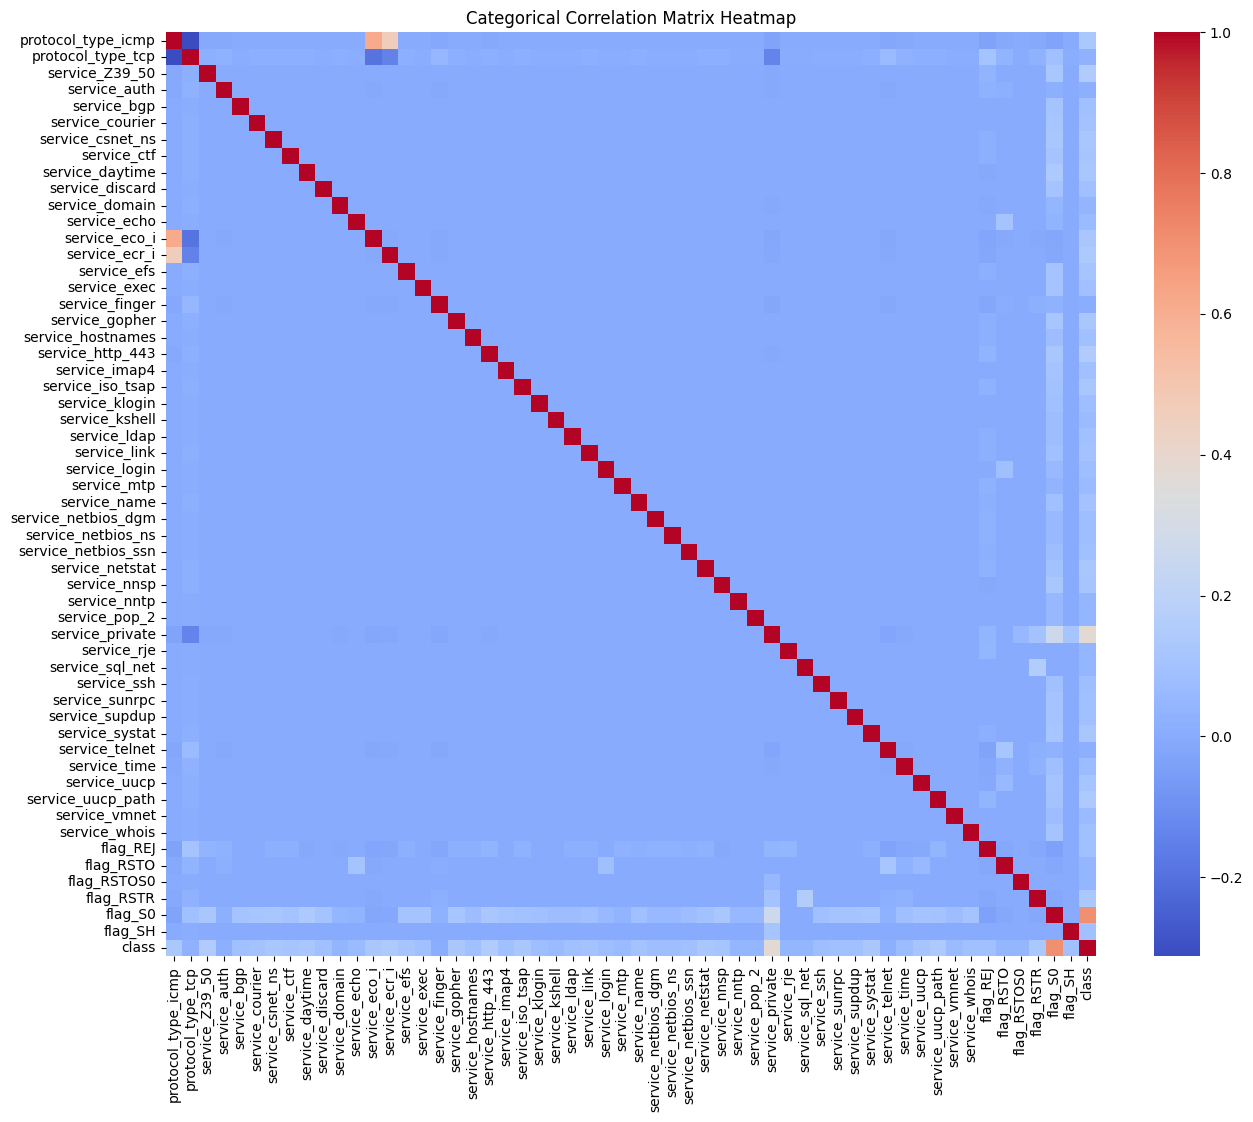

In [ ]:
# Visualize using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Categorical Correlation Matrix Heatmap")
plt.show()

### Protocol Correlation


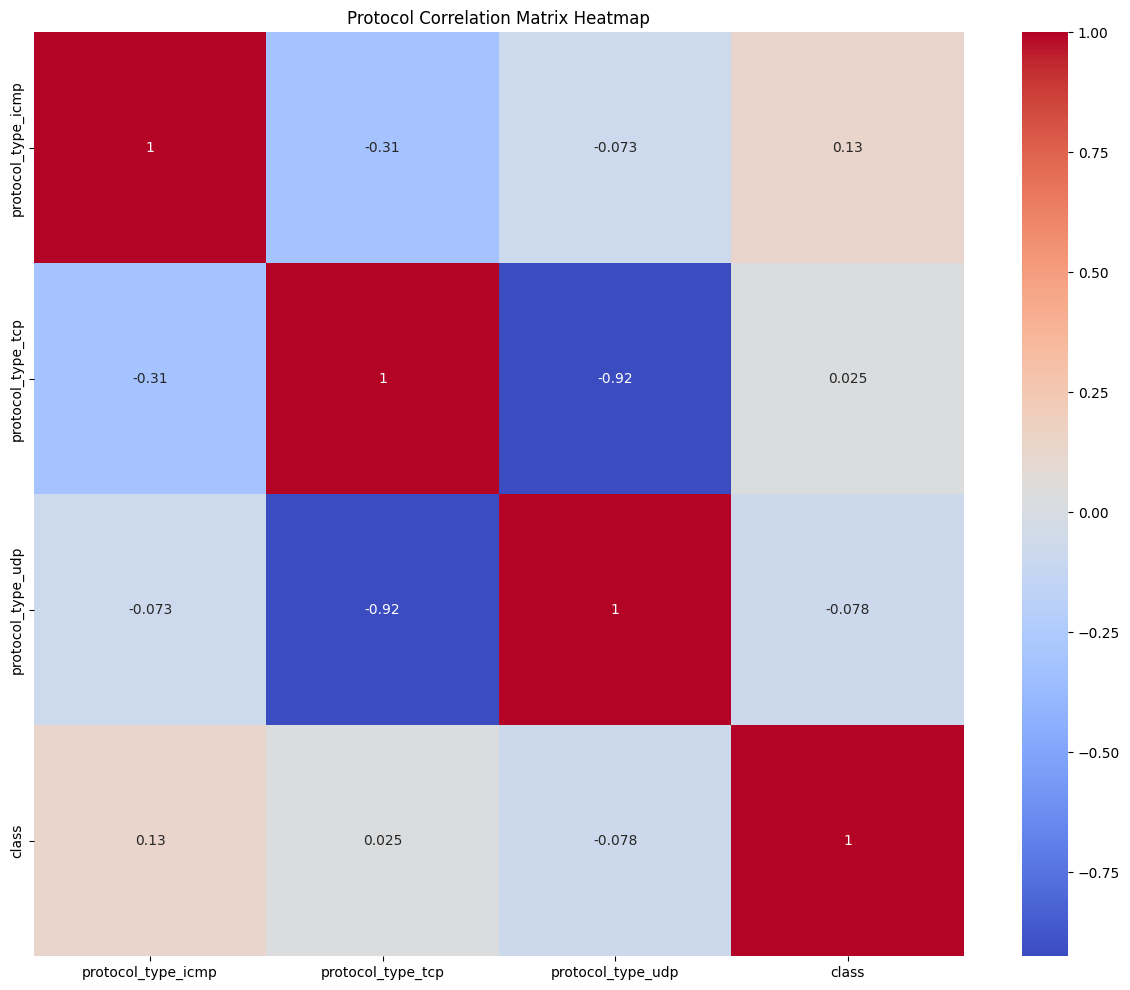

In [ ]:
protocol_train_df = train_df_categorical_data[['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'class']]

# Apply one-hot encoding
df_encoded = pd.get_dummies(protocol_train_df,
                            drop_first = True)

# Select numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Protocol Correlation Matrix Heatmap")
plt.show()

### Service Correlation

<ipython-input-17-d0fb2190f8a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  service_train_df['class'] = three_category_train_df['class']


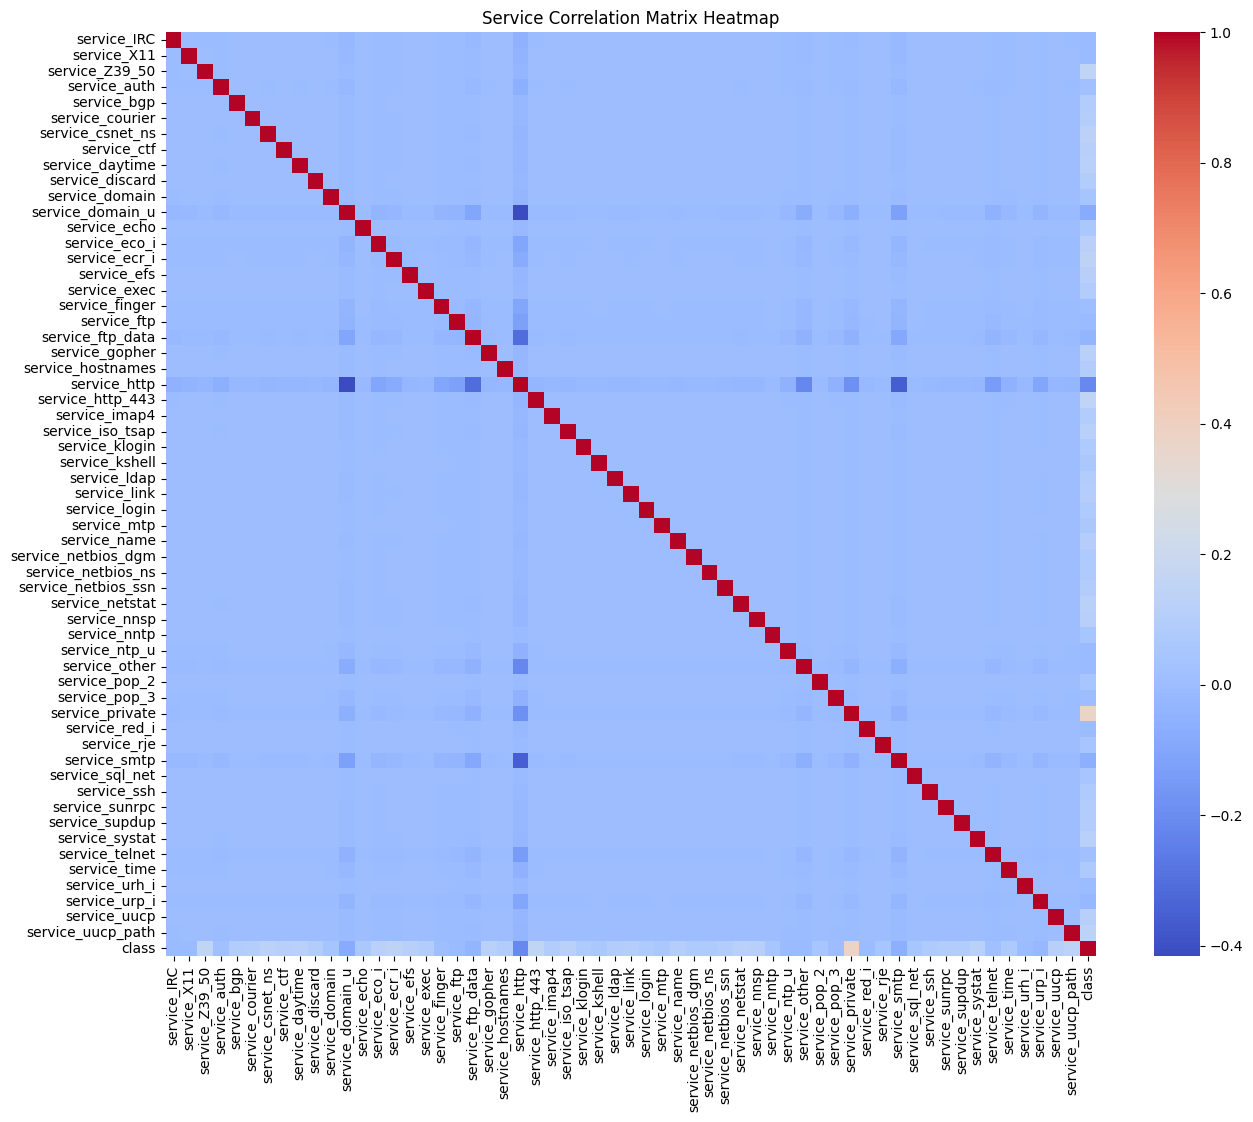

In [ ]:
service_train_df = train_df_categorical_data.iloc[:,3:61]
service_train_df['class'] = three_category_train_df['class']

# Apply one-hot encoding
df_encoded = pd.get_dummies(service_train_df,
                            drop_first = True)

# Select numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Service Correlation Matrix Heatmap")
plt.show()

### Flag Correlation

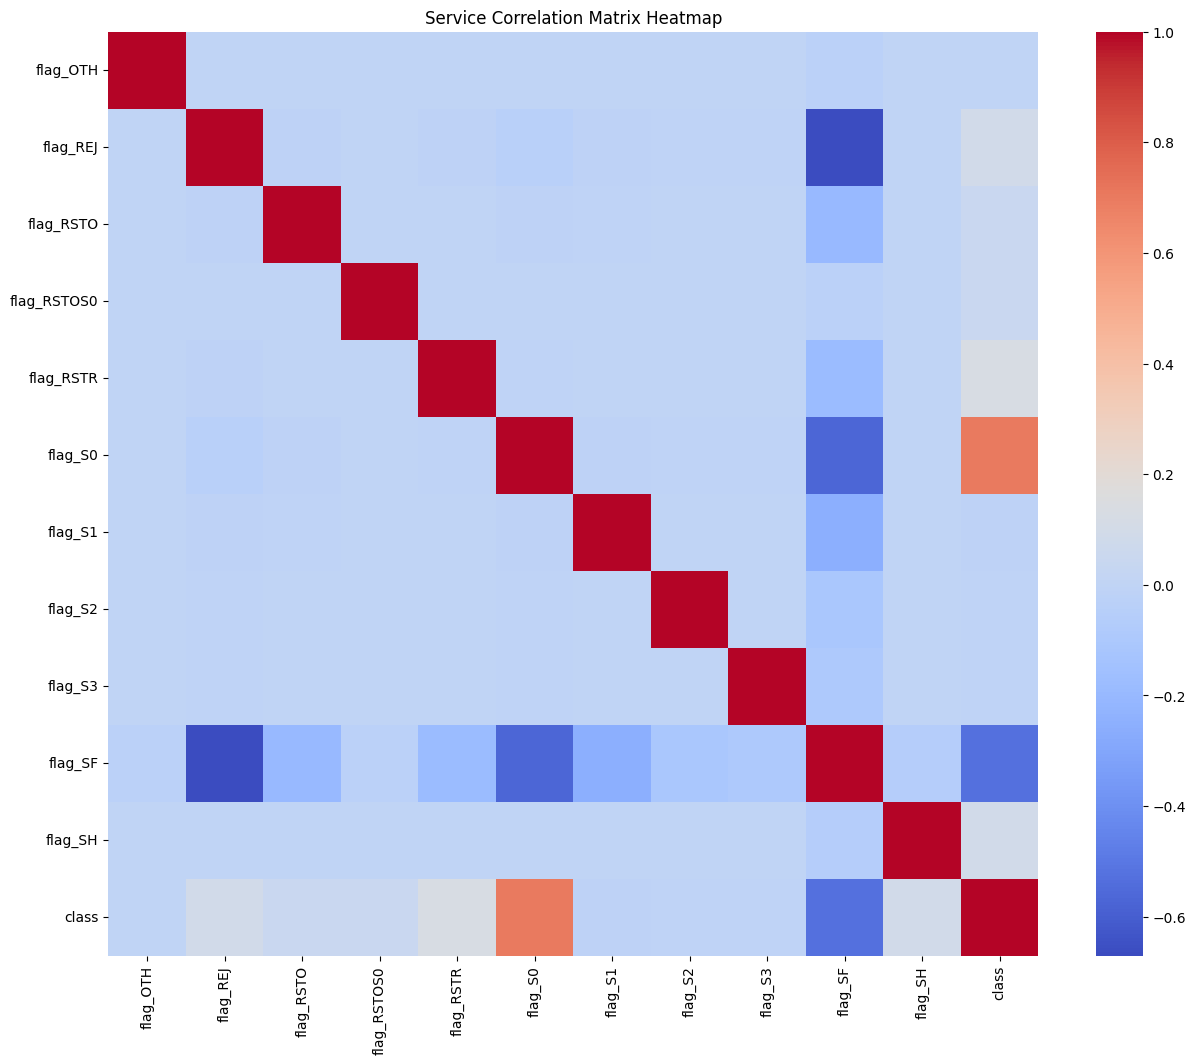

In [ ]:
flag_train_df = train_df_categorical_data.iloc[:,63:]
flag_train_df['class'] = three_category_train_df['class']

# Apply one-hot encoding
df_encoded = pd.get_dummies(flag_train_df,
                            drop_first = True)

# Select numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Service Correlation Matrix Heatmap")
plt.show()

### Categoric Correlation Results
#### Protocol
  Based on the correlation matrix generated applying one-hot encoding, we have determined that the protocol that correlates with anomalous classification the most is `ICMP`. This is most likely due to `ICMP` allowing devices to communicate error messages about network communication, which if errors are raised, it will trigger an anomalous classification. For this, its most likely best to choose the second most correlated protocol, which is **`TCP`**. UDP had the lowest correlation to anomalous classification. This will imply the use of SYN Flooding as we will see more evidence for in the correlation of numeric variables to anomalous behavior.

#### Service
  Based on the correlation matrix generated applying one-hot encoding, we have determined that the service that correlates with anomalous classification the most is `private`. I believe `private` may be a general term for privately used services, looking at the runner ups we can gather that Z39_50, http_443, ecr_i, have the next highest correlation to anamolous behavior.

#### Flags
  Based on the correlation matrix generated flag_S0 had the highest correlation to anomalous behavior with flag_RSTR and flag_REJ closely behind. flag_S0, when raised, corresponds to when a TCP packet where only the SYN flag is set. This implies that SYN flooding could be an issue as previously mentioned, where flags are being raised when recieving a number of SYN requests but no ACK's are recieved when SYN/ACK is sent back.

## Numeric Variable Correlation


In [ ]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(three_category_train_df,
                            columns = categorical_columns,
                            drop_first = False)

# Select numeric columns
numeric_columns = df_encoded.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

dis_all_attributes_to_class(correlation_matrix)

duration: 0.04303417626691077
src_bytes: 5.700722293423448e-05
dst_bytes: -0.012193006387906944
land: -0.001972476206977561
wrong_fragment: 0.12070927433394474
urgent: 0.04515291810823731
hot: -0.015532841150214971
num_failed_logins: -0.005348278423528268
logged_in: -0.2955697049476158
num_compromised: -0.0054922065314899965
root_shell: -0.0004377702920557189
su_attempted: -0.00797711645324301
num_root: -0.005605253254633559
num_file_creations: -0.006897411155614418
num_shells: -0.005220076444927438
num_access_files: -0.012105100134542317
num_outbound_cmds: nan
is_host_login: nan
is_guest_login: -0.02288261068003651
count: 0.4113609324723203
srv_count: -0.0025110036533930974
serror_rate: 0.6665112328005379
srv_serror_rate: 0.6823331574920052
rerror_rate: 0.13848024994202562
srv_rerror_rate: 0.13822527622298467
same_srv_rate: -0.6319328819841254
diff_srv_rate: 0.06516685335847407
srv_diff_host_rate: -0.043989148327703405
dst_host_count: 0.14739597414029396
dst_host_srv_count: -0.3298830

### Visualization of Numeric Attributes of Correlation Matrix

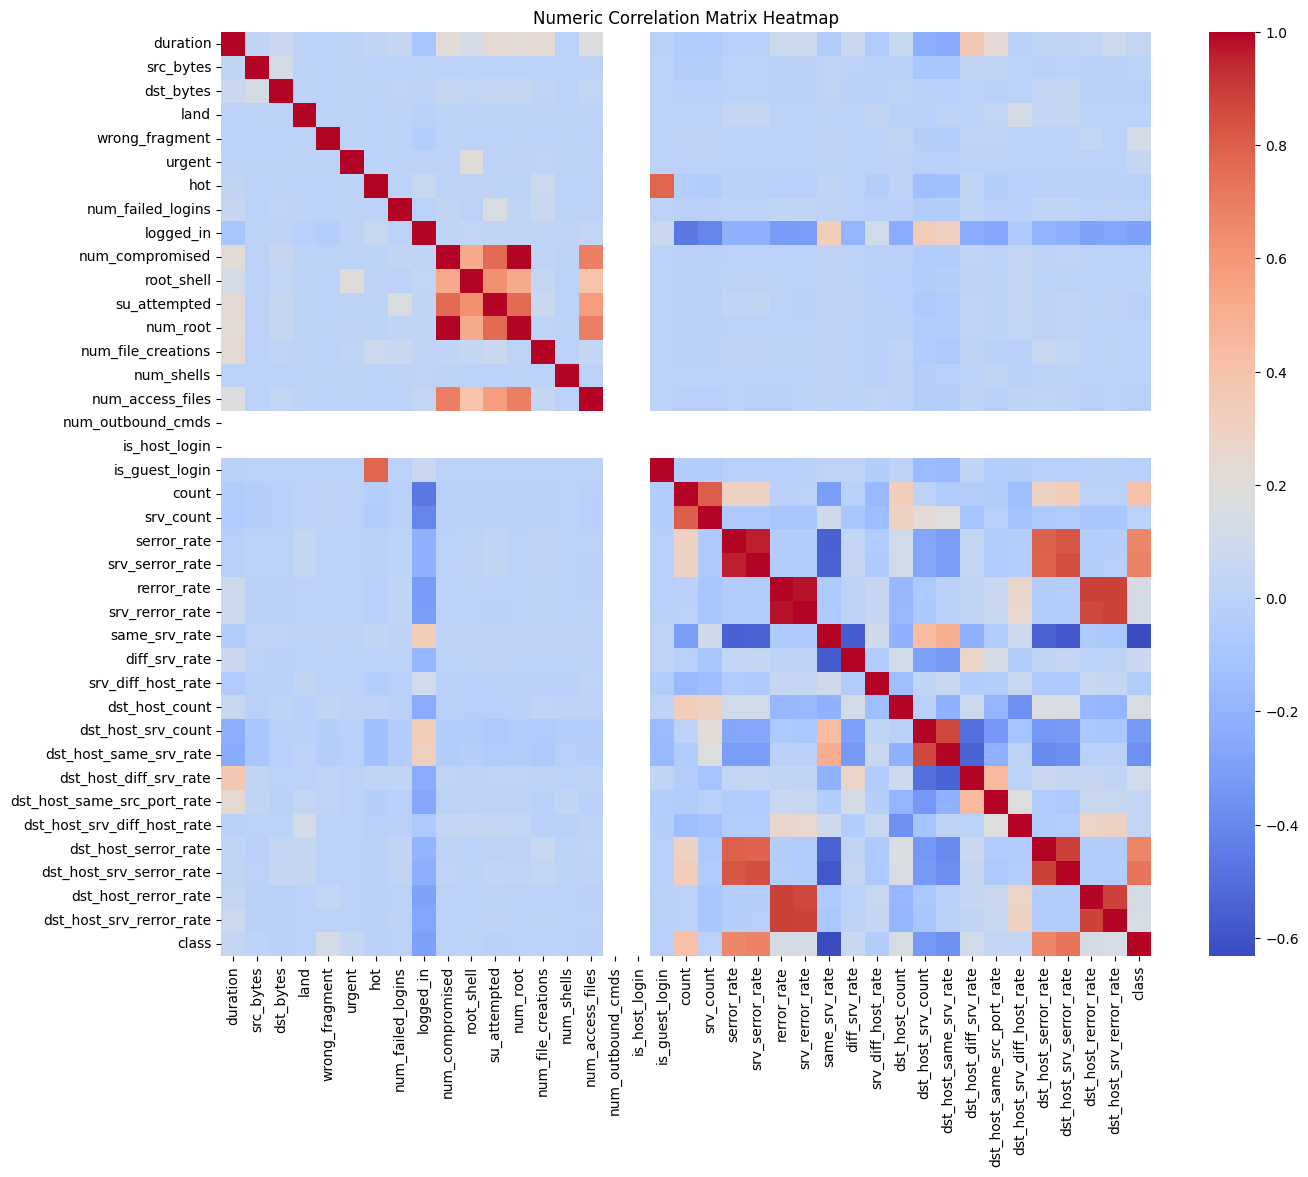

In [ ]:
# Visualize using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Numeric Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Display the attributes with correlation greater than 0
attributes_of_importance = dis_important_attributes(correlation_matrix)
attributes_of_importance.append('class')

duration: 0.04303417626691077
src_bytes: 5.700722293423448e-05
wrong_fragment: 0.12070927433394474
urgent: 0.04515291810823731
count: 0.4113609324723203
serror_rate: 0.6665112328005379
srv_serror_rate: 0.6823331574920052
rerror_rate: 0.13848024994202562
srv_rerror_rate: 0.13822527622298467
diff_srv_rate: 0.06516685335847407
dst_host_count: 0.14739597414029396
dst_host_diff_srv_rate: 0.11352865322049482
dst_host_same_src_port_rate: 0.04157916330627439
dst_host_srv_diff_host_rate: 0.03635369635208129
dst_host_serror_rate: 0.6721970944652587
dst_host_srv_serror_rate: 0.729648857240465
dst_host_rerror_rate: 0.13829354269226388
dst_host_srv_rerror_rate: 0.14509259206805547


### Visualization of Numeric 'Important Attributes' of Correlation Matrix

In [ ]:
# Created dataframe excluding 'less important' attributes
selected_train_df = three_category_train_df[attributes_of_importance]

# Select numeric columns
numeric_columns = selected_train_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

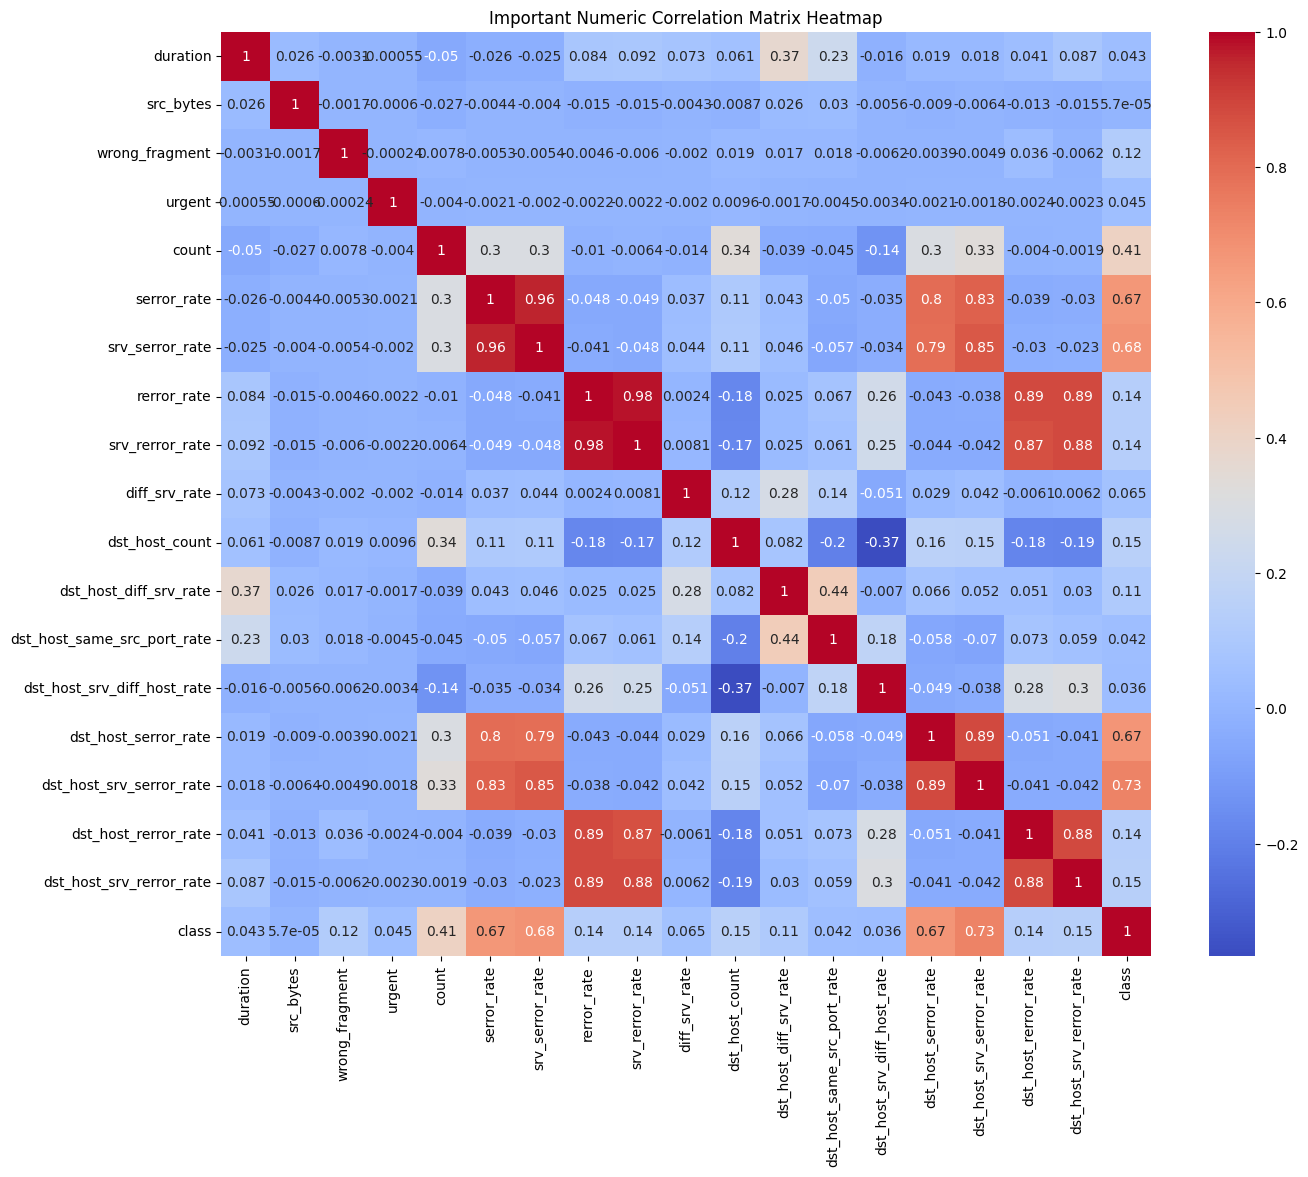

In [ ]:
# Visualize using a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title("Important Numeric Correlation Matrix Heatmap")
plt.show()

In [ ]:
three_category_train_df['class'].unique()

array([0, 1])

### Numeric Correlation Results
Based on the correlation matrix generated applying one-hot encoding, excluding the attributes that had a correlation value less than 0, we have determined the five attributes of most importance to be;
1. `dst_host_srv_serror_rate`
2. `srv_serror_rate`
3. `dst_host_serror_rate`
4. `serror_rate`
5. `count`

Each attribute above having a high signifigance has an implications to the types of interactions the system considers anomalous behavior. Let us explore each of the following attributes in detail.

#### `dst_host_srv_serror_rate`
  The attribute `dst_host_srv_serror_rate` is responsible for recording the percentage of connections in `dst_host_srv_count` with "SYN" errors.

#### `srv_serror_rate`
  The attribute `srv_serror_rate` is responsible for recording the percentage of connections in srv_count with "SYN" errors.

#### `dst_host_serror_rate`
  The attribute `dst_host_serror_rate` is responsible for recording the percentage of connections in dst_host_srv_count with "SYN" errors.

#### `serror_rate`
  The attribute `serror_rate` is responsible for recording the percentage of connections in count with "SYN" errors.

#### `count`
 The attribute `count` is responsible for recording the number of connections to the same host as the current connection within a specific time window. This attribute being important implies that there are recorded events in which the number of connections to the same host are being made in succession being flagged as anomalous behavior. This could be evidence of a number of attacks but most likely corresponds to DDoS attacks in which a malicious attempt is made to disrupt a server by flooding it with traffic. This is further implied by the other attributes of high correlation that handle `SYN` errors like the attribute `dst_host_serror_rate`.

 These variables of high correlation, are all highly correlated to one another.I believe some variables included in the dataset may be redundant, as their correlations at times are nearly 1 to 1.

# Methods

## Loading Data

In [ ]:
#Load train and test sets
nates_data_folder = "/content/drive/MyDrive/Data/IntrusionDetectionData"
files = loadData(nates_data_folder)

train_file = files[1]
print(train_file)
train_df = pd.read_csv(train_file)
train_df.head()

test_file = files[0]
print(test_file)
test_df = pd.read_csv(test_file)

/content/drive/MyDrive/Data/IntrusionDetectionData/train_subset.csv
/content/drive/MyDrive/Data/IntrusionDetectionData/test_subset.csv


## Data Cleaning and Preprocessing

We started by splitting the dataset into features and target variables: train_features, train_labels, test_features, and test_labels. The target variable, class, identifies whether a record is "normal" or an "anomaly." To prepare the data for binary classification, we mapped the target labels so that normal is 0 and anomaly is 1.

For preprocessing, we categorized the columns into categorical, binary, and numerical types. Categorical columns like protocol type, service, and flag represent network-related information. Binary columns such as land and logged_in don't require scaling, while numeric columns were standardized to normalize their values.

We found some labels in the testing set that weren't present in the training set, such as printer, remote_job, shell, and tim_i, which represent specific protocols for printing, remote job execution, shell access, and time synchronization. To prevent mismatches during processing, we combined all unique labels from the training and testing sets for protocol_type, service, and flag to ensure categorical labels were consistent when one-hot encoding.

We scaled the numeric features and one-hot encoded the categorical ones. Then, we combined these features with the binary columns to create a similar dataset for both training and testing. However, there was major class imbalance in the training set, with 10,759 normal records compared to only 470 anomalies. To address this, we used SMOTE to oversample the anomaly class and prevent the model from overfitting to the normal class.

After preprocessing, we had 116 features due to one-hot encoding. To reduce dimensionality and avoid overfitting, we applied PCA to condense these features into 10 principal components while retaining 90.4% of the original variance before preprocessing, ensuring that we kept the most important trends.

In [ ]:
# Split features and target columns
X_train = train_df.drop(columns=['class'])
y_train = train_df['class']
X_test = test_df.drop(columns=['class'])
y_test = test_df['class']

# map target labels to binary for modeling and visualization
y_train = y_train.map({'normal': 0, 'anomaly': 1})
y_test = y_test.map({'normal': 0, 'anomaly': 1})

# identify cat, num, bin, and scaled columns for preprocessing
categorical_cols = ['protocol_type', 'service', 'flag']  # categorical cols
binary_cols = ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login']  # binary cols
numeric_cols = train_df.select_dtypes(include=np.number).columns.to_list()  # numeric cols
scaled_cols = [col for col in numeric_cols if col not in binary_cols]  # cols to scale

# combine unique categorical labels in train and test sets
unique_services = pd.concat([train_df['service'], test_df['service']]).unique()
unique_protocols = pd.concat([train_df['protocol_type'], test_df['protocol_type']]).unique()
unique_flags = pd.concat([train_df['flag'], test_df['flag']]).unique()

# scale numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[scaled_cols])
X_test_scaled = scaler.transform(X_test[scaled_cols])

# encode categorical data
encoder = OneHotEncoder(sparse_output=False, categories=[unique_protocols, unique_services, unique_flags], handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# combine all features after preprocessing
X_train_processed = np.hstack([X_train_scaled, X_train[binary_cols].values, X_train_encoded])
X_test_processed = np.hstack([X_test_scaled, X_test[binary_cols].values, X_test_encoded])

# balance classes with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

# Reduce features with PCA - 116 features to 10 PCs
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test_processed)

In [ ]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum()}")

Explained variance ratio: 0.9040573224561604


## Logistic Regression Model

We chose logistic regression because it is a simple and effective model for binary classification tasks like identifying normal and anomalous activity in the KDD-CUP-99 dataset. It works well when the relationship between the features and the target variable can be modeled as a weighted combination of inputs. Its simplicity, interpretability, and speed made it a strong option for this project.

The model performed well, with an overall accuracy of 95%. It achieved high precision, 0.94 for normal and 0.97 for anomalies, and recall, 0.97 for normal and 0.93 for anomalies, showing it was good at correctly identifying both classes. The F1-scores of 0.95 for both classes reflect a solid balance between precision and recall. From the confusion matrix, the model only had 176 false negatives and 73 false positives out of 5039 records, meaning it handled the classification task effectively.

The ROC-AUC curve supported these results, with a high AUC score of 0.98, showing the model's ability to separate normal and anomalous activity across different thresholds.

In summary, logistic regression was a reliable choice for this project. It made good use of the balanced training data and preprocessing steps like SMOTE and PCA, performing strongly on the test data and proving to be a great model for detecting intrusions.

In [ ]:
# logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train_balanced)

# predictions on test set
y_test_preds = log_reg.predict(X_test_pca)
y_test_probs = log_reg.predict_proba(X_test_pca)[:, 1]

# evaluate model
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2690
           1       0.97      0.93      0.95      2349

    accuracy                           0.95      5039
   macro avg       0.95      0.95      0.95      5039
weighted avg       0.95      0.95      0.95      5039



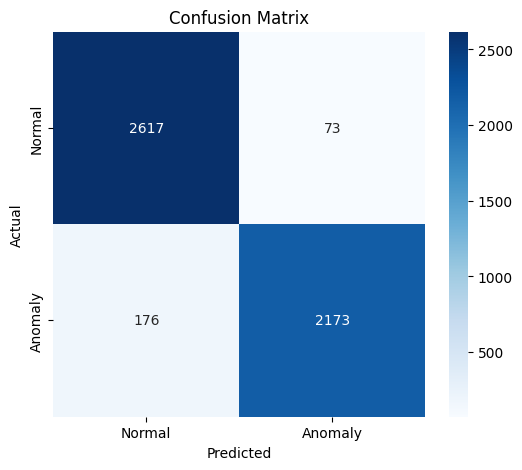

In [ ]:
# Generate confusion matrix
log_cm = confusion_matrix(y_test, y_test_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression ROC-AUC Score: 0.9801842435521879


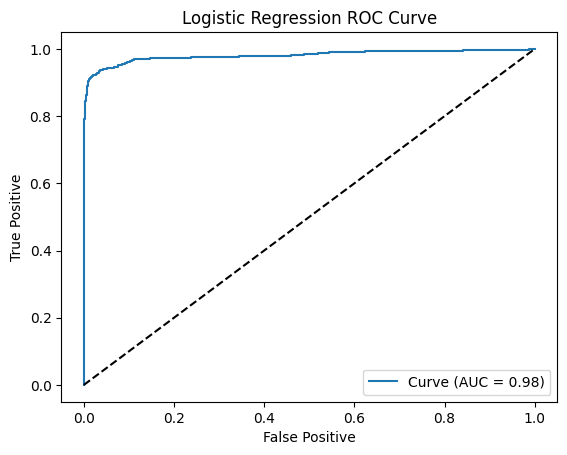

In [ ]:
# receiver operation curve
roc_auc = roc_auc_score(y_test, y_test_probs)
print(f"Logistic Regression ROC-AUC Score: {roc_auc}")

# plot receiver operation curve
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
plt.plot(fpr, tpr, label=f"Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # reference line
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Random Forests Model

The Random Forests model performed exceptionally well in detecting intrusions within the KDD-CUP-99 dataset. Its ability to handle high-dimensional data and work with imbalanced classes made it a great fit for this task. Unlike other models, it didn’t need PCA because Random Forests can handle high-dimensional and correlated features naturally. To address the imbalance in the training data, we applied SMOTE to create a balanced dataset for training, while testing was done on the original, unaltered test set.

The model showed impressive results, with a precision of 0.97 for normal activity and 1.00 for anomalies, and recall scores of 1.00 for normal and 0.97 for anomalies. This led to high F1-scores for both classes, meaning the model achieved an excellent balance between precision and recall. The confusion matrix showed only 71 anomalies misclassified as normal out of 5039 total records, proving its ability to reliably detect anomalies while keeping false positives low.

The ROC-AUC curve confirmed these results, with an AUC score of nearly 1.00. This means the model was nearly perfect at separating normal and anomalous activity. The steep rise in the curve toward the true positive rate axis reflects the model's high sensitivity and specificity.

Overall, with an accuracy of 99%, the Random Forests model proved to be both reliable and robust. Its strong performance on unseen data shows how well it generalized, making it an excellent choice for intrusion detection in this dataset.

In [ ]:
# random forests model
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # no tree depth limit
    random_state=42
)

# train random forests
rf_model.fit(X_train_balanced, y_train_balanced)

# predict on test data
y_test_rf_preds = rf_model.predict(X_test_processed)

# evaluate model
print(classification_report(y_test, y_test_rf_preds))  # precision, recall, f1 score

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2690
           1       1.00      0.97      0.98      2349

    accuracy                           0.99      5039
   macro avg       0.99      0.98      0.99      5039
weighted avg       0.99      0.99      0.99      5039



[[2690    0]
 [  71 2278]]


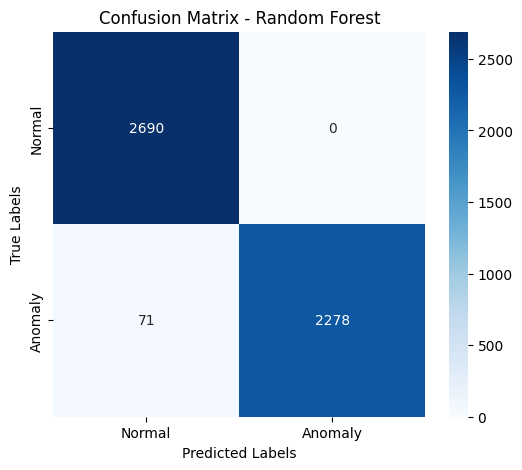

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_rf_preds)
print(cm)

# cm plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Random Forests ROC-AUC Score: 0.9986938996424961


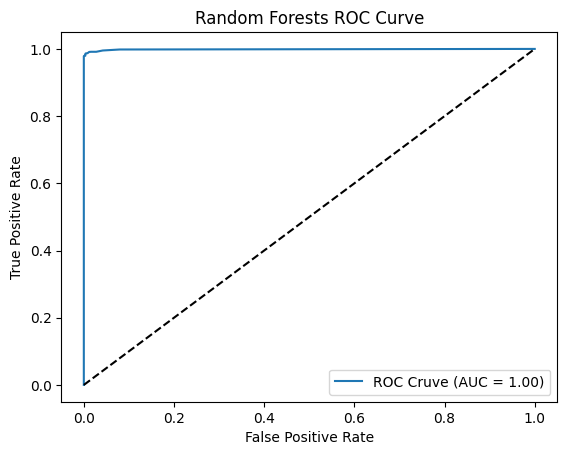

In [ ]:
# probability for test set
rf_probs = rf_model.predict_proba(X_test_processed)[:, 1]

# roc auc
rf_roc_auc = roc_auc_score(y_test, rf_probs)
print(f"Random Forests ROC-AUC Score: {rf_roc_auc}")

# roc auc curve
plt.figure()
fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label=f"ROC Cruve (AUC = {rf_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forests ROC Curve")
plt.legend(loc="lower right")
plt.show()

## KMeans Model

We chose K-means because it is a simple and efficient clustering algorithm for unsupervised learning. It works well for identifying patterns in the KDD-CUP-99 dataset, especially since it doesn't need labeled data for training. This makes it a good option for exploring the structure of the data, particularly for tasks like intrusion detection.

K-means handles high-dimensional data effectively, and by using PCA, we reduced the dataset to its most important features. This helped remove unnecessary noise and allowed K-means to focus on meaningful trends, making the clustering process more accurate.

In this project, we worked with preprocessed data but did not apply SMOTE, as K-means doesn't rely on class labels during training. Instead, we re-applied PCA to the processed data to simplify the features and improve the algorithm's performance. This allowed us to find natural groupings in the data, helping us understand how normal and anomalous network activity is distributed.

The K-Means model shows mixed efficacy in detecting anomalies and normal activity. It correctly classified 2678 normal records and 1386 anomalies but struggled with 963 false negatives, misclassifying anomalies as normal. Precision is high for anomalies, 0.99, indicating accurate predictions when anomalies are detected, but recall is low, 0.59, missing many anomalies. Conversely, the model achieves perfect recall for normal activity, 1.00, correctly identifying all normal records, but at the expense of a moderate precision of 0.74. Overall accuracy is 81%, with an F1-score of 0.85 for normal and 0.74 for anomalies.

The ROC-AUC curve for K-means gave us more insight into the model's performance. With an AUC score of 0.79, it show that the model has moderate success in separating normal from anomalous activity. The curve revealed that the model could achieve a high true positive rate under certain conditions, but often led to a higher false positive rate. The model prioritizes grouping data into clusters than on achieving high classification accuracy.

The results indicate that K-means tends to favor the normal activity. While it performs well in identifying normal activity, the model's high false negative rate and moderate ROC-AUC score limit its ability to detect anomalies. Although K-means offers useful insights into how the data is grouped, it is not the best choice for intrusion detection task where accurately identifying anomalies is essential.  

In [ ]:
# Preprocessing already done above
# PCA for k-means
pca = PCA(n_components=10)
X_train_pca_kmeans = pca.fit_transform(X_train_processed)
X_test_pca_kmeans = pca.transform(X_test_processed)

# k-means for two classes - normal and anomaly
kmeans_model = KMeans(n_clusters=2, random_state=42, n_init=10)

# train k-means on training set
kmeans_model.fit(X_train_pca_kmeans)

# predict clusters on testing set
y_test_kmeans_preds = kmeans_model.predict(X_test_pca_kmeans)

# map kmeans clusters to classes
cluster_map = {0: 0, 1: 1}
y_test_mapped_preds = [cluster_map[label] for label in y_test_kmeans_preds]

# evaluate model results
print(classification_report(y_test, y_test_mapped_preds))  # precision, recall, f1 score

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2690
           1       0.99      0.59      0.74      2349

    accuracy                           0.81      5039
   macro avg       0.86      0.79      0.79      5039
weighted avg       0.85      0.81      0.80      5039



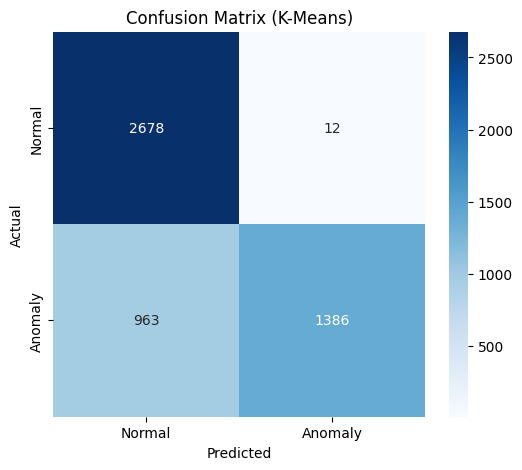

In [ ]:
# confusion matrix
cm_kmeans = confusion_matrix(y_test, y_test_mapped_preds)

# cm plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix (K-Means)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Means ROC-AUC Score: 0.7927886738167471


<ipython-input-36-2c05bdba523d>:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', linestyle='--')
<ipython-input-36-2c05bdba523d>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', linestyle='--')


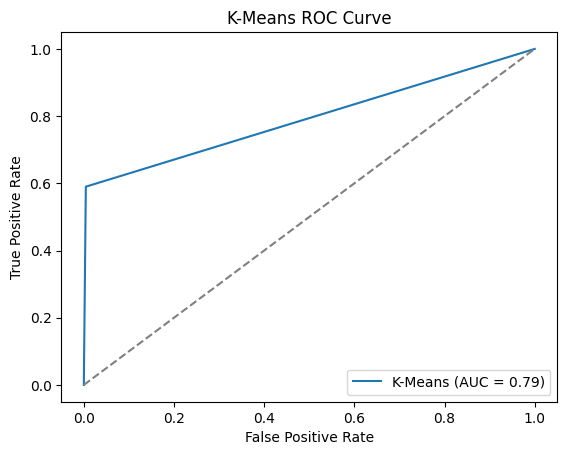

In [ ]:
# probabilities for anomaly class
kmeans_probs = [1 if pred == 1 else 0 for pred in y_test_mapped_preds]

# roc auc score
kmeans_roc_auc = roc_auc_score(y_test, kmeans_probs)
print(f"K-Means ROC-AUC Score: {kmeans_roc_auc}")

# plot roc curve
plt.figure()
fpr, tpr, _ = roc_curve(y_test, kmeans_probs)
plt.plot(fpr, tpr, label=f"K-Means (AUC = {kmeans_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("K-Means ROC Curve")
plt.legend(loc="lower right")
plt.show()

## CNN Model

For our deep learning model, we decided to implement a convolutional neural network (CNN). We chose this model due to its ability to effectively capture local patterns as well as its ability to automatically learn feature representation from the input data which reduces the need for manual feature adjustments. These abilities also make CNNs very powerful in anomaly detection in network intrusion datasets, where subtle patterns can distinguish anomolies from normal data. The model that we created is composed of three convolutional layers with each being followed by a max-pooling layer. The goal with this was to reduce dimensionality while also retaining the most significant features. We also used ReLu activation function to prevent gradient vanishing issues. Lastly, a flattening layer and a dense layer transforms the feature maps into a 1D array and outputs a single probability value using a sigmoid activation function for binary classification.

This model performed very well, with a test accuracy of 98% and an AUC-ROC of 0.99. This indicates that the model had strong discrimination between normal and anomolous instances. So, this model successfully detected anomalies in the data with high accuracy and minimal false positives.

In [ ]:
#data reshaping
X_train_cnn = X_train_processed.reshape(-1, X_train_processed.shape[1], 1)
X_test_cnn = X_test_processed.reshape(-1, X_test_processed.shape[1], 1)

#feature and label types
X_train_cnn = X_train_cnn.astype(np.float32)
X_test_cnn = X_test_cnn.astype(np.float32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [ ]:
# define model
cnn_model = Sequential()

#first convolutional layer
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))

#second convolutional layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))  # Reduced pool_size

#third convolutional layer
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2)) # Reduced pool_size

#flatten layer
cnn_model.add(Flatten())

#dense layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model compile
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model training
history = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9648 - loss: 0.1094 - val_accuracy: 0.9597 - val_loss: 0.1824
Epoch 2/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9960 - loss: 0.0185 - val_accuracy: 0.9442 - val_loss: 0.2144
Epoch 3/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - loss: 0.0172 - val_accuracy: 0.9661 - val_loss: 0.1486
Epoch 4/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0200 - val_accuracy: 0.9589 - val_loss: 0.2399
Epoch 5/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0126 - val_accuracy: 0.9569 - val_loss: 0.1767
Epoch 6/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9653 - val_loss: 0.1682
Epoch 7/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.9661 - val_loss: 0.1601
Epoch 8/50
351/351 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9978 - loss: 0.0069 - val_accuracy: 

In [ ]:
# model evaluation on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy}")

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9816 - loss: 0.2350
Test Accuracy: 0.978765606880188


In [ ]:
#test data prediction
y_pred = cnn_model.predict(X_test_cnn)
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


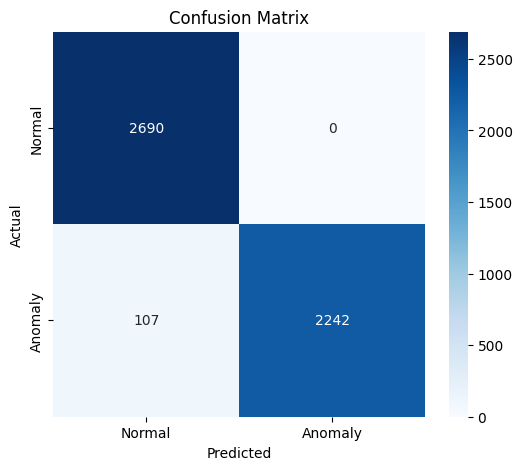

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

#cm plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, y_pred_classes, target_names=['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       0.96      1.00      0.98      2690
     Anomaly       1.00      0.95      0.98      2349

    accuracy                           0.98      5039
   macro avg       0.98      0.98      0.98      5039
weighted avg       0.98      0.98      0.98      5039



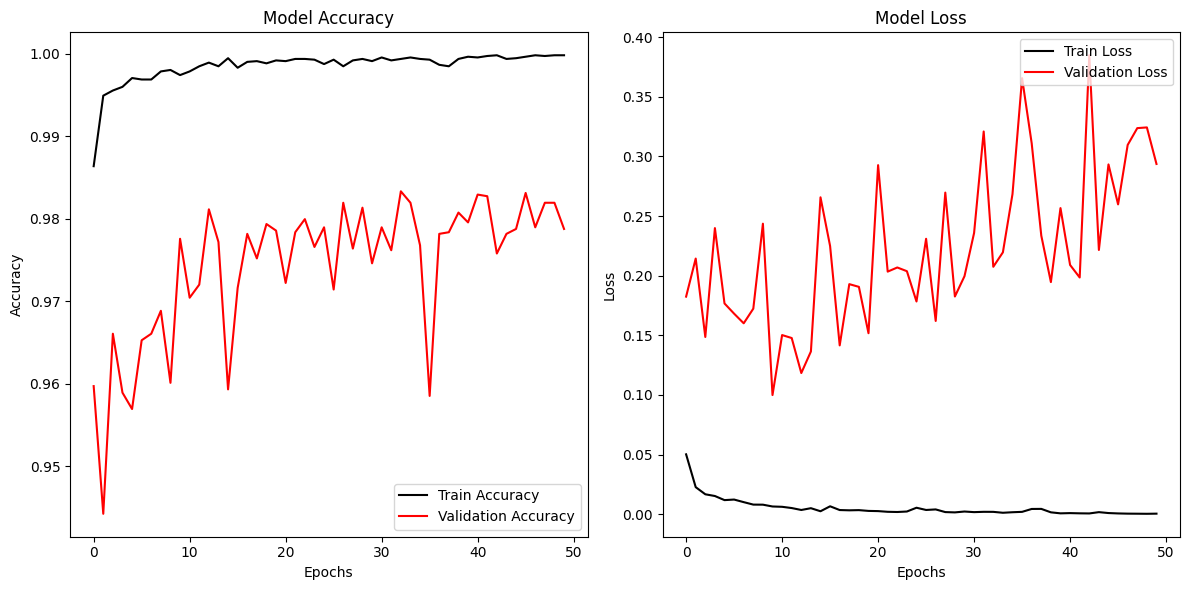

In [ ]:
#model accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='k', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right') #to avoid blocking plot

#model loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='k', label='Train Loss')
plt.plot(history.history['val_loss'],color='r', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right') #to avoid blocking plot

#plot both
plt.tight_layout()
plt.show()

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


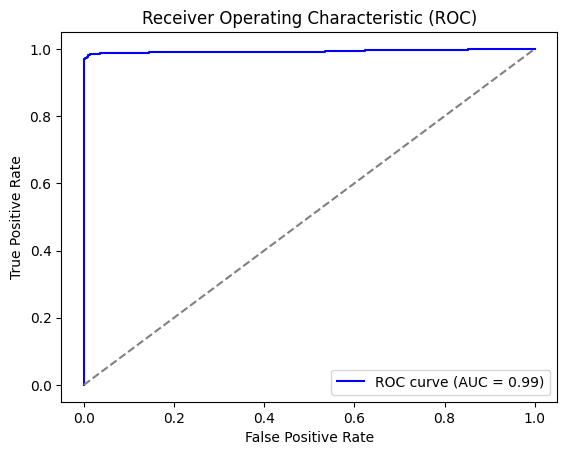

In [ ]:
# probability for anomaly
y_pred_prob = cnn_model.predict(X_test_cnn)

# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# plot roc curve
plt.figure()
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Sources
* [Encoding Categorical Data with One-hot Encoding](https://blog.paperspace.com/encoding-categorical-data-with-one-hot-encoding/)